In [1]:
import math

from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import pandas as pd
import os
import socket

socket.setdefaulttimeout(60000000)

plt.rcParams["font.family"] = "Outfit"
# plt.rcParams["font.sans-serif"] = ["Outfit"]

In [2]:
# path to the data folder
DATA_PATH = "../../arb-data"

CURRENCIES = {"USD", "EUR", "JPY", "GBP", "CNH", "AUD", "CAD", "CHF", "HKD", "SGD"}

In [3]:
df = pd.DataFrame({"timestamp": [], "cycle": [], "profit": [], "Date": []})

for file in os.listdir(f"{DATA_PATH}/"):
    if "casche" not in file:
        continue
    date = file.split("_")[-1].split(".")[0]
    print(f"{DATA_PATH}/{file}")
    file_df = pd.read_csv(f"{DATA_PATH}/{file}")
    file_df["Date"] = datetime.strptime(date, "%Y-%m-%d")
    df = pd.concat([df, file_df], ignore_index=True)

df

../../arb-data/casche_all_arbitrages_cycles_2_5_usd_eur_jpy_gbp_cnh_aud_cad_chf_hkd_sgd_2025-02-17.csv
../../arb-data/casche_all_arbitrages_cycles_2_5_usd_eur_jpy_gbp_cnh_aud_cad_chf_hkd_sgd_2025-02-03.csv


/var/folders/vn/fnkqmd6j4v7d8hktrkxjs1cm0000gn/T/ipykernel_13152/1815308193.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, file_df], ignore_index=True)


../../arb-data/casche_all_arbitrages_cycles_2_5_usd_eur_jpy_gbp_cnh_aud_cad_chf_hkd_sgd_2025-02-02.csv
../../arb-data/casche_all_arbitrages_cycles_2_5_usd_eur_jpy_gbp_cnh_aud_cad_chf_hkd_sgd_2025-02-16.csv
../../arb-data/casche_all_arbitrages_cycles_2_5_usd_eur_jpy_gbp_cnh_aud_cad_chf_hkd_sgd_2025-02-28.csv
../../arb-data/casche_all_arbitrages_cycles_2_5_usd_eur_jpy_gbp_cnh_aud_cad_chf_hkd_sgd_2025-02-14.csv
../../arb-data/casche_all_arbitrages_cycles_2_5_usd_eur_jpy_gbp_cnh_aud_cad_chf_hkd_sgd_2025-02-05.csv
../../arb-data/casche_all_arbitrages_cycles_2_5_usd_eur_jpy_gbp_cnh_aud_cad_chf_hkd_sgd_2025-02-11.csv
../../arb-data/casche_all_arbitrages_cycles_2_5_usd_eur_jpy_gbp_cnh_aud_cad_chf_hkd_sgd_2025-02-10.csv
../../arb-data/casche_all_arbitrages_cycles_2_5_usd_eur_jpy_gbp_cnh_aud_cad_chf_hkd_sgd_2025-02-04.csv
../../arb-data/casche_all_arbitrages_cycles_2_5_usd_eur_jpy_gbp_cnh_aud_cad_chf_hkd_sgd_2025-02-12.csv
../../arb-data/casche_all_arbitrages_cycles_2_5_usd_eur_jpy_gbp_cnh_aud_c

,timestamp,cycle,profit,Date
0,1.739750e+09,JPY/HKD/JPY,1.000029,2025-02-17
1,1.739750e+09,USD/JPY/HKD/USD,1.000017,2025-02-17
2,1.739750e+09,JPY/CAD/JPY,1.000000,2025-02-17
3,1.739750e+09,USD/EUR/JPY/CAD/USD,1.000006,2025-02-17
4,1.739750e+09,USD/JPY/CAD/HKD/USD,1.000001,2025-02-17
...,...,...,...,...
107048907,1.740614e+09,USD/JPY/HKD/USD,1.000073,2025-02-26
107048908,1.740614e+09,JPY/HKD/JPY,1.000073,2025-02-26
107048909,1.740614e+09,USD/JPY/HKD/USD,1.000073,2025-02-26
107048910,1.740614e+09,USD/JPY/CAD/HKD/USD,1.000020,2025-02-26


In [4]:
# convert profit and base to usd to floats
df["profit"] = df["profit"].astype(float)

# convert the cycle to a list of symbols and store its length
# df["Cycle"] = df["Cycle"].str.split()
# df["Cycle Length"] = df["Cycle"].apply(lambda i: len(i))

df

,timestamp,cycle,profit,Date
0,1.739750e+09,JPY/HKD/JPY,1.000029,2025-02-17
1,1.739750e+09,USD/JPY/HKD/USD,1.000017,2025-02-17
2,1.739750e+09,JPY/CAD/JPY,1.000000,2025-02-17
3,1.739750e+09,USD/EUR/JPY/CAD/USD,1.000006,2025-02-17
4,1.739750e+09,USD/JPY/CAD/HKD/USD,1.000001,2025-02-17
...,...,...,...,...
107048907,1.740614e+09,USD/JPY/HKD/USD,1.000073,2025-02-26
107048908,1.740614e+09,JPY/HKD/JPY,1.000073,2025-02-26
107048909,1.740614e+09,USD/JPY/HKD/USD,1.000073,2025-02-26
107048910,1.740614e+09,USD/JPY/CAD/HKD/USD,1.000020,2025-02-26


In [5]:
df["Cycle Length"] = df["cycle"].apply(lambda i: i.count("/"))

df

,timestamp,cycle,profit,Date,Cycle Length
0,1.739750e+09,JPY/HKD/JPY,1.000029,2025-02-17,2
1,1.739750e+09,USD/JPY/HKD/USD,1.000017,2025-02-17,3
2,1.739750e+09,JPY/CAD/JPY,1.000000,2025-02-17,2
3,1.739750e+09,USD/EUR/JPY/CAD/USD,1.000006,2025-02-17,4
4,1.739750e+09,USD/JPY/CAD/HKD/USD,1.000001,2025-02-17,4
...,...,...,...,...,...
107048907,1.740614e+09,USD/JPY/HKD/USD,1.000073,2025-02-26,3
107048908,1.740614e+09,JPY/HKD/JPY,1.000073,2025-02-26,2
107048909,1.740614e+09,USD/JPY/HKD/USD,1.000073,2025-02-26,3
107048910,1.740614e+09,USD/JPY/CAD/HKD/USD,1.000020,2025-02-26,4


In [6]:
# filter out rows with a profit of 1 since those are useless
df = df[df["profit"] > 1 + 10 ** (-13)]

df

,timestamp,cycle,profit,Date,Cycle Length
0,1.739750e+09,JPY/HKD/JPY,1.000029,2025-02-17,2
1,1.739750e+09,USD/JPY/HKD/USD,1.000017,2025-02-17,3
2,1.739750e+09,JPY/CAD/JPY,1.000000,2025-02-17,2
3,1.739750e+09,USD/EUR/JPY/CAD/USD,1.000006,2025-02-17,4
4,1.739750e+09,USD/JPY/CAD/HKD/USD,1.000001,2025-02-17,4
...,...,...,...,...,...
107048907,1.740614e+09,USD/JPY/HKD/USD,1.000073,2025-02-26,3
107048908,1.740614e+09,JPY/HKD/JPY,1.000073,2025-02-26,2
107048909,1.740614e+09,USD/JPY/HKD/USD,1.000073,2025-02-26,3
107048910,1.740614e+09,USD/JPY/CAD/HKD/USD,1.000020,2025-02-26,4


In [22]:
df[["profit", "Cycle Length"]].describe()

,profit,Cycle Length
count,1.070489e+08,1.070489e+08
mean,1.000199e+00,4.492754e+00
std,4.284516e-04,7.724733e-01
min,1.000000e+00,2.000000e+00
25%,1.000029e+00,4.000000e+00
50%,1.000079e+00,5.000000e+00
75%,1.000188e+00,5.000000e+00
max,1.044237e+00,5.000000e+00


In [ ]:
# count the number of arb opportunities at each profit level
profits = {}
for i in df["Profit"]:
    profits[i] = profits.get(i, 0) + 1

profits

In [ ]:
# plot the arb profits
ps = [i for i in sorted(profits)]
counts = [math.log(profits[i]) for i in ps]

plt.plot(ps, counts)
plt.title("Profit Counts (Jan-Mar)")
plt.ylabel("Arbitrage Count")
plt.xlabel("Profit")
plt.show()

In [26]:
filtered_path = "../../data/filtered"

data_density = {}
for file in os.listdir(f"{filtered_path}/"):
    if "filtered" not in file:
        continue
    date = file.split("_")[0]
    data_density[date] = {}
    temp = pd.read_csv(f"{filtered_path}/{file}")
    timestamps = temp["participant_timestamp"].nunique()
    data_density[date]['n_timestamps'] = timestamps

data_density

{'2025-01-07': {'n_timestamps': 86368},
 '2025-03-04': {'n_timestamps': 86376},
 '2025-03-03': {'n_timestamps': 86382},
 '2025-01-15': {'n_timestamps': 86337},
 '2025-01-12': {'n_timestamps': 6604},
 '2025-03-16': {'n_timestamps': 10098},
 '2025-03-11': {'n_timestamps': 86359},
 '2025-01-24': {'n_timestamps': 79141},
 '2025-01-23': {'n_timestamps': 86382},
 '2025-03-27': {'n_timestamps': 86376},
 '2025-03-20': {'n_timestamps': 86268},
 '2025-02-09': {'n_timestamps': 6987},
 '2025-01-31': {'n_timestamps': 79199},
 '2025-01-13': {'n_timestamps': 86372},
 '2025-01-14': {'n_timestamps': 86211},
 '2025-03-10': {'n_timestamps': 86390},
 '2025-03-17': {'n_timestamps': 86384},
 '2025-01-01': {'n_timestamps': 10076},
 '2025-01-06': {'n_timestamps': 86360},
 '2025-03-02': {'n_timestamps': 6856},
 '2025-03-05': {'n_timestamps': 86375},
 '2025-01-30': {'n_timestamps': 86383},
 '2025-01-22': {'n_timestamps': 86376},
 '2025-03-21': {'n_timestamps': 75597},
 '2025-03-26': {'n_timestamps': 86368},
 '2

In [31]:
arb_cts = df.groupby("Date")["timestamp"].nunique()
arb_cts

Date
2025-01-01     5030
2025-01-02    57412
2025-01-03    23839
2025-01-05      305
2025-01-06    34798
              ...  
2025-03-26    42142
2025-03-27    58820
2025-03-28    39597
2025-03-30     2609
2025-03-31    40138
Name: timestamp, Length: 77, dtype: int64

In [32]:
arb_cts.at["2025-01-01"]

np.int64(5030)

In [34]:
for date in data_density:
    d = datetime.strptime(date, "%Y-%m-%d")
    data_density[date]["n_arbs"] = int(arb_cts.at[date])

data_density

{'2025-01-07': {'n_timestamps': 86368, 'n_arbs': 29621},
 '2025-03-04': {'n_timestamps': 86376, 'n_arbs': 40030},
 '2025-03-03': {'n_timestamps': 86382, 'n_arbs': 35725},
 '2025-01-15': {'n_timestamps': 86337, 'n_arbs': 31340},
 '2025-01-12': {'n_timestamps': 6604, 'n_arbs': 712},
 '2025-03-16': {'n_timestamps': 10098, 'n_arbs': 2175},
 '2025-03-11': {'n_timestamps': 86359, 'n_arbs': 39128},
 '2025-01-24': {'n_timestamps': 79141, 'n_arbs': 77630},
 '2025-01-23': {'n_timestamps': 86382, 'n_arbs': 47055},
 '2025-03-27': {'n_timestamps': 86376, 'n_arbs': 58820},
 '2025-03-20': {'n_timestamps': 86268, 'n_arbs': 54490},
 '2025-02-09': {'n_timestamps': 6987, 'n_arbs': 1688},
 '2025-01-31': {'n_timestamps': 79199, 'n_arbs': 40636},
 '2025-01-13': {'n_timestamps': 86372, 'n_arbs': 30283},
 '2025-01-14': {'n_timestamps': 86211, 'n_arbs': 26508},
 '2025-03-10': {'n_timestamps': 86390, 'n_arbs': 40885},
 '2025-03-17': {'n_timestamps': 86384, 'n_arbs': 35384},
 '2025-01-01': {'n_timestamps': 10076

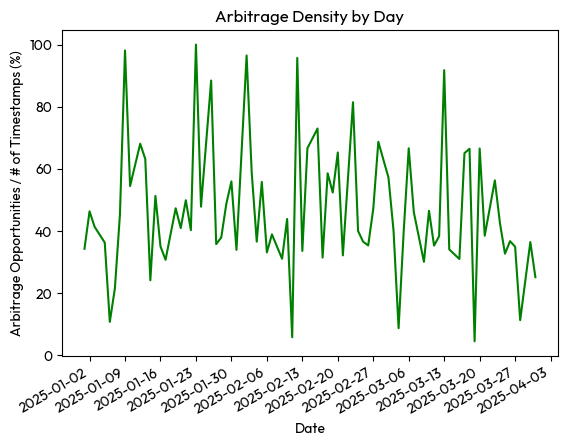

In [35]:
dates = list(data_density.keys())
new_dates = [datetime.strptime(i, "%Y-%m-%d") for i in dates]
new_dates = list(sorted(new_dates))
densities = [100 * data_density[d]["n_arbs"] / data_density[d]["n_timestamps"] for d in dates]

plt.plot(new_dates, densities, color="green")
plt.title("Arbitrage Density by Day")
plt.xlabel("Date")
plt.ylabel("Arbitrage Opportunities / # of Timestamps (%)")
# Show ticks every 7 days
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.gcf().autofmt_xdate()

In [71]:
no_outliers = df[df["profit"] < 1.02]
no_outliers = df[df["profit"] > 1 + 10 ** (-13)]
no_outliers["profit"] = no_outliers["profit"] - 1
no_outliers

/var/folders/vn/fnkqmd6j4v7d8hktrkxjs1cm0000gn/T/ipykernel_15700/261366445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers["profit"] = no_outliers["profit"] - 1


,timestamp,cycle,profit,Date,Cycle Length
0,1.739750e+09,JPY/HKD/JPY,2.861816e-05,2025-02-17,2
1,1.739750e+09,USD/JPY/HKD/USD,1.711429e-05,2025-02-17,3
2,1.739750e+09,JPY/CAD/JPY,9.159204e-08,2025-02-17,2
3,1.739750e+09,USD/EUR/JPY/CAD/USD,6.191136e-06,2025-02-17,4
4,1.739750e+09,USD/JPY/CAD/HKD/USD,1.235040e-06,2025-02-17,4
...,...,...,...,...,...
107048907,1.740614e+09,USD/JPY/HKD/USD,7.282205e-05,2025-02-26,3
107048908,1.740614e+09,JPY/HKD/JPY,7.306163e-05,2025-02-26,2
107048909,1.740614e+09,USD/JPY/HKD/USD,7.282205e-05,2025-02-26,3
107048910,1.740614e+09,USD/JPY/CAD/HKD/USD,2.019341e-05,2025-02-26,4


In [46]:
max_profit = no_outliers.sort_values("profit", ascending=False).groupby("Date", as_index=False).head(1)

In [65]:
max_profit_filtered = [(i, j) for i, j in zip(max_profit["Date"], max_profit["profit"])]
max_profit_filtered.sort()
max_profit_dates = [i[0] for i in max_profit_filtered]
max_profit_profits = [i[1] for i in max_profit_filtered]

max_profit_dates

[Timestamp('2025-01-01 00:00:00'),
 Timestamp('2025-01-02 00:00:00'),
 Timestamp('2025-01-03 00:00:00'),
 Timestamp('2025-01-05 00:00:00'),
 Timestamp('2025-01-06 00:00:00'),
 Timestamp('2025-01-07 00:00:00'),
 Timestamp('2025-01-08 00:00:00'),
 Timestamp('2025-01-09 00:00:00'),
 Timestamp('2025-01-10 00:00:00'),
 Timestamp('2025-01-12 00:00:00'),
 Timestamp('2025-01-13 00:00:00'),
 Timestamp('2025-01-14 00:00:00'),
 Timestamp('2025-01-15 00:00:00'),
 Timestamp('2025-01-16 00:00:00'),
 Timestamp('2025-01-17 00:00:00'),
 Timestamp('2025-01-19 00:00:00'),
 Timestamp('2025-01-20 00:00:00'),
 Timestamp('2025-01-21 00:00:00'),
 Timestamp('2025-01-22 00:00:00'),
 Timestamp('2025-01-23 00:00:00'),
 Timestamp('2025-01-24 00:00:00'),
 Timestamp('2025-01-26 00:00:00'),
 Timestamp('2025-01-27 00:00:00'),
 Timestamp('2025-01-28 00:00:00'),
 Timestamp('2025-01-29 00:00:00'),
 Timestamp('2025-01-30 00:00:00'),
 Timestamp('2025-01-31 00:00:00'),
 Timestamp('2025-02-02 00:00:00'),
 Timestamp('2025-02-

In [72]:
mean_profit = no_outliers.groupby("Date")["profit"].mean()
mean_profit = [(i, j) for i, j in zip(mean_profit.index, mean_profit.values)]
mean_profit.sort()
mean_profit_dates = [i[0] for i in mean_profit]
mean_profit = [i[1] for i in mean_profit]

mean_profit_dates
mean_profit

[np.float64(0.0004415939298895903),
 np.float64(6.849159918410737e-05),
 np.float64(5.2363294025126085e-05),
 np.float64(4.1565053826728745e-05),
 np.float64(0.00010311795135909192),
 np.float64(9.369814593840117e-05),
 np.float64(0.0001229777307811865),
 np.float64(5.9620699613041804e-05),
 np.float64(0.00016501177290609179),
 np.float64(9.619014072427232e-05),
 np.float64(8.345915415398309e-05),
 np.float64(8.91903823218123e-05),
 np.float64(8.646405585848805e-05),
 np.float64(6.816046031820624e-05),
 np.float64(6.792535910059218e-05),
 np.float64(8.973525372143669e-05),
 np.float64(0.00018597943218988012),
 np.float64(0.0005914820833750729),
 np.float64(0.00010572497799843443),
 np.float64(8.901491425532977e-05),
 np.float64(9.87949719599693e-05),
 np.float64(6.238300430218863e-05),
 np.float64(0.00010406645226202881),
 np.float64(0.0001229723615595938),
 np.float64(0.00012188678568239082),
 np.float64(7.506192625251114e-05),
 np.float64(0.00011625384420230638),
 np.float64(0.001023

(array([20090., 20097., 20104., 20111., 20118., 20125., 20132., 20139.,
        20146., 20153., 20160., 20167., 20174., 20181.]),
 [Text(20090.0, 0, '2025-01-02'),
  Text(20097.0, 0, '2025-01-09'),
  Text(20104.0, 0, '2025-01-16'),
  Text(20111.0, 0, '2025-01-23'),
  Text(20118.0, 0, '2025-01-30'),
  Text(20125.0, 0, '2025-02-06'),
  Text(20132.0, 0, '2025-02-13'),
  Text(20139.0, 0, '2025-02-20'),
  Text(20146.0, 0, '2025-02-27'),
  Text(20153.0, 0, '2025-03-06'),
  Text(20160.0, 0, '2025-03-13'),
  Text(20167.0, 0, '2025-03-20'),
  Text(20174.0, 0, '2025-03-27'),
  Text(20181.0, 0, '2025-04-03')])

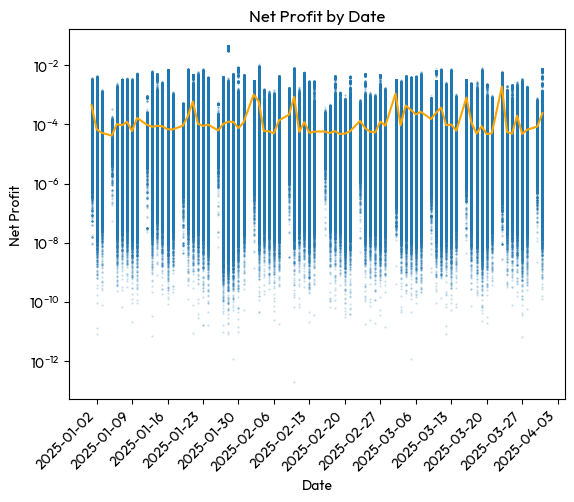

In [76]:
# plt.plot(max_profit_dates, max_profit_profits)
plt.plot(mean_profit_dates, mean_profit, color="orange")
plt.scatter(no_outliers["Date"], no_outliers["profit"], alpha=0.25, s=0.25)
plt.yscale("log")

plt.title("Net Profit by Date")
plt.xlabel("Date")
plt.ylabel("Net Profit")
# Show ticks every 7 days
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.xticks(rotation=45, ha='right')
# plt.gcf().autofmt_xdate()

In [13]:
fees = [i / 10 for i in range(20, 101)]
fee_adjusted = {fee: 0 for fee in fees}
for fee in fees:
    fee_adjusted[fee] = len(df[df["profit"] > 1 + fee * df["Cycle Length"] / 100000])

fee_adjusted

{2.0: 50223104,
 2.1: 48678153,
 2.2: 47203276,
 2.3: 45785658,
 2.4: 44420449,
 2.5: 43114410,
 2.6: 41857279,
 2.7: 40642663,
 2.8: 39477614,
 2.9: 38350740,
 3.0: 37263564,
 3.1: 36215100,
 3.2: 35203019,
 3.3: 34222254,
 3.4: 33273537,
 3.5: 32361796,
 3.6: 31481265,
 3.7: 30628503,
 3.8: 29808991,
 3.9: 29019142,
 4.0: 28258030,
 4.1: 27524842,
 4.2: 26817267,
 4.3: 26138002,
 4.4: 25482834,
 4.5: 24855415,
 4.6: 24251481,
 4.7: 23669565,
 4.8: 23112419,
 4.9: 22574892,
 5.0: 22058832,
 5.1: 21563244,
 5.2: 21088124,
 5.3: 20633867,
 5.4: 20196232,
 5.5: 19776911,
 5.6: 19376101,
 5.7: 18989908,
 5.8: 18618039,
 5.9: 18259278,
 6.0: 17913894,
 6.1: 17581799,
 6.2: 17264649,
 6.3: 16959050,
 6.4: 16663151,
 6.5: 16379554,
 6.6: 16107892,
 6.7: 15846042,
 6.8: 15593681,
 6.9: 15350261,
 7.0: 15115127,
 7.1: 14887066,
 7.2: 14668625,
 7.3: 14458560,
 7.4: 14253396,
 7.5: 14054264,
 7.6: 13861829,
 7.7: 13674508,
 7.8: 13492022,
 7.9: 13315440,
 8.0: 13144129,
 8.1: 12977435,
 8.2: 12

In [15]:
fee_items = [(i, j) for i, j in sorted(fee_adjusted.items())]
fees = [i[0] for i in fee_items]
fee_opportunities = [i[1] for i in fee_items]

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/var/folders/vn/fnkqmd6j4v7d8hktrkxjs1cm0000gn/T/ipykernel_13152/750997773.py:4: SyntaxWarning: invalid escape sequence '\$'
  plt.xlabel("Forex Commission (\$ per \$100k volume)")


Text(0.5, 0, 'Forex Commission (\\$ per \\$100k volume)')

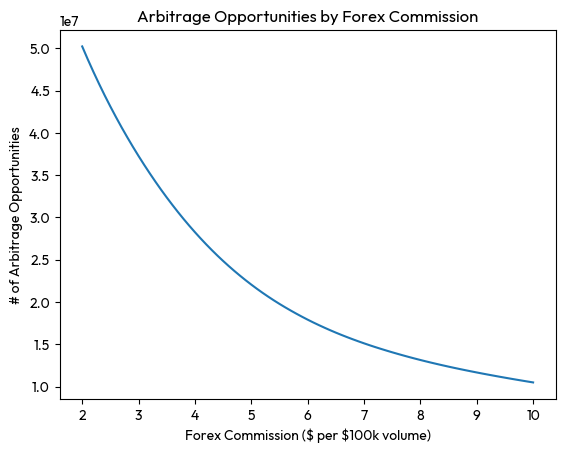

In [18]:
plt.plot(fees, fee_opportunities)
plt.title("Arbitrage Opportunities by Forex Commission")
plt.ylabel("# of Arbitrage Opportunities")
plt.xlabel("Forex Commission (\$ per \$100k volume)")

In [22]:
best_opportunity = df[df["profit"] == df["profit"].max()]
best_opportunity

,timestamp,cycle,profit,Date,Cycle Length
100661704,1.738102e+09,USD/GBP/CHF/HKD/USD,1.044237,2025-01-28,4
100661962,1.738102e+09,USD/GBP/CHF/HKD/USD,1.044237,2025-01-28,4
100662222,1.738102e+09,USD/GBP/CHF/HKD/USD,1.044237,2025-01-28,4
100662481,1.738102e+09,USD/GBP/CHF/HKD/USD,1.044237,2025-01-28,4
